<a href="https://colab.research.google.com/github/luizrhamada/Global_Temperature_Change/blob/main/GlobalTemperatureChange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and download latest version of dataset

In [7]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = kagglehub.dataset_download("sevgisarac/temperature-change")
print("Path to dataset files:", df)

Path to dataset files: /root/.cache/kagglehub/datasets/sevgisarac/temperature-change/versions/4


In [8]:
df = pd.read_csv('Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding='latin-1')
df.info()
df = df.dropna()
pd.set_option('display.max_columns', None)
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     9656 non-null   int64  
 1   Area          9656 non-null   object 
 2   Months Code   9656 non-null   int64  
 3   Months        9656 non-null   object 
 4   Element Code  9656 non-null   int64  
 5   Element       9656 non-null   object 
 6   Unit          9656 non-null   object 
 7   Y1961         8287 non-null   float64
 8   Y1962         8322 non-null   float64
 9   Y1963         8294 non-null   float64
 10  Y1964         8252 non-null   float64
 11  Y1965         8281 non-null   float64
 12  Y1966         8364 non-null   float64
 13  Y1967         8347 non-null   float64
 14  Y1968         8345 non-null   float64
 15  Y1969         8326 non-null   float64
 16  Y1970         8308 non-null   float64
 17  Y1971         8303 non-null   float64
 18  Y1972         8323 non-null 

Indentifying and removing duplicated data

In [9]:
print(df.drop_duplicates(inplace=True)) # None

None


Analyzing descriptive statistics

In [10]:
pd.set_option('display.max_columns', 70) # garantindo a análise de todas as colunas
print(df.describe())

         Area Code  Months Code  Element Code        Y1961        Y1962  \
count  6760.000000  6760.000000   6760.000000  6760.000000  6760.000000   
mean   1086.105917  7009.900296   6674.500000     0.425294     0.333025   
std    2040.464809     6.051840    596.544125     0.728307     0.746674   
min       2.000000  7001.000000   6078.000000    -4.018000    -5.391000   
25%      84.000000  7005.000000   6078.000000     0.063000    -0.031000   
50%     151.000000  7009.000000   6674.500000     0.377000     0.345000   
75%     234.000000  7016.000000   7271.000000     0.730000     0.682250   
max    5873.000000  7020.000000   7271.000000     5.771000     4.373000   

             Y1963        Y1964        Y1965        Y1966        Y1967  \
count  6760.000000  6760.000000  6760.000000  6760.000000  6760.000000   
mean      0.333066     0.287458     0.240283     0.400098     0.278136   
std       0.885451     0.778018     0.766360     0.772728     0.761136   
min      -8.483000    -7.309

- Área code: the numerical code of area column
- Área: Countries e Territories
- Months code: the numerical code of months column
- Element code: the numerical code of element column
- Element: temperature change, standard deviation
- Unit: celcius degree °C

Only temperature changes

In [12]:
df = df.query("Element == 'Temperature change'")

Calculating mean values grouped by Area

In [13]:
df = df.groupby('Area').mean(numeric_only=True)
print(df)
df.info()

                Area Code  Months Code  Element Code     Y1961     Y1962  \
Area                                                                       
Afghanistan           2.0  7009.882353        7271.0  0.027941 -0.197471   
Africa             5100.0  7009.882353        7271.0 -0.089000 -0.006353   
Albania               3.0  7009.882353        7271.0  0.473235  0.238941   
Algeria               4.0  7009.882353        7271.0  0.302059  0.029706   
Americas           5200.0  7009.882353        7271.0 -0.005941 -0.017941   
...                   ...          ...           ...       ...       ...   
Western Europe     5404.0  7009.882353        7271.0  0.905824 -0.680941   
Western Sahara      205.0  7009.882353        7271.0  0.694941  0.410706   
World              5000.0  7009.882353        7271.0  0.155941  0.053235   
Zambia              251.0  7010.437500        7271.0  0.147937 -0.157375   
Zimbabwe            181.0  7009.882353        7271.0  0.234412  0.206000   

           

Selection all lines and columns from Y1961 ahead

In [14]:
df = df.loc[:,'Y1961':]

df = pd.DataFrame(df.mean()).reset_index(drop=False)
df.columns=['year','temp_change']
df['year'] = df['year'].apply(lambda x: x[1:]).astype(np.int64)
# print(df)

Plot of Global Temperature Change Mean - 1961 to 2019

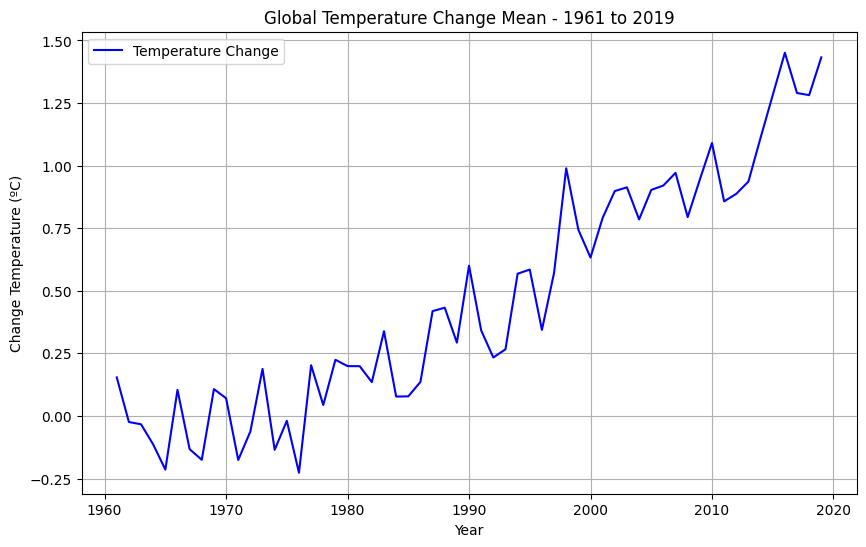

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['temp_change'], label='Temperature Change', color='blue')
plt.xlabel('Year')
plt.ylabel('Change Temperature (ºC)')
plt.title('Global Temperature Change Mean - 1961 to 2019')
plt.legend()
plt.grid(True)
plt.show()

Linear Model Regression

In [16]:
X = np.array(df['year']).reshape(-1,1)
y = np.array(df['temp_change'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

Linear Regression metrics

In [17]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolut Error (MAE): {mae:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"Coeficient of Determination (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.04
Mean Absolut Error (MAE): 0.15
Coeficient of Determination (R²): 0.83


Prediction of temperature change to 2030

In [18]:
ano_2030 = np.array([[2026]])
temperatura_2030 = modelo.predict(ano_2030)
print(f"Temperature change prediction to 2030 will be {temperatura_2030[0]:.2f}°C")

Temperature change prediction to 2030 will be 1.42°C


Predict temperature change until 2030

In [19]:
future_years = np.arange(1961, 2031).reshape(-1, 1)  # 1961 to 2030
pred = modelo.predict(future_years)

Plot of Linear predction of temperatures change and scatter real data of temperature changes from 1961 to 2019

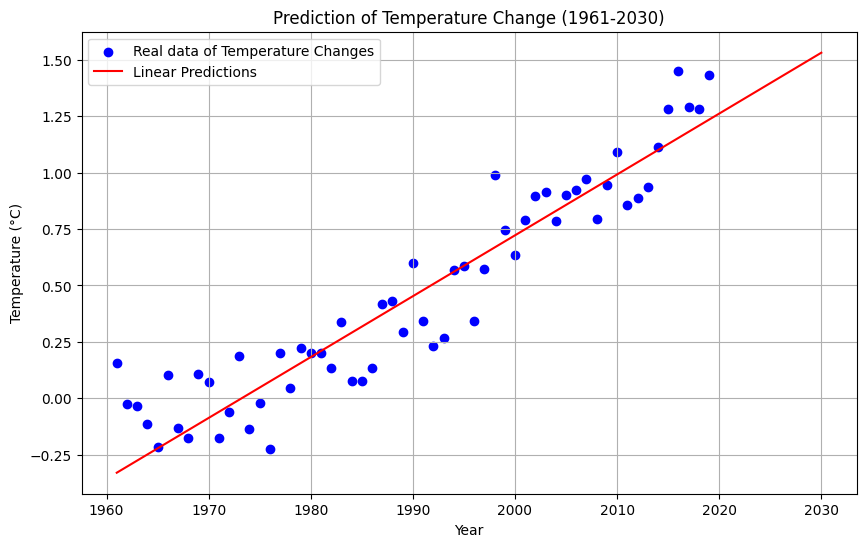

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['temp_change'], color='blue', label='Real data of Temperature Changes')
plt.plot(future_years, pred, color='red', label='Linear Predictions')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Prediction of Temperature Change (1961-2030)')
plt.legend()
plt.grid(True)
plt.show()